In [115]:
# Make sure that you have all these libaries available to run the code successfully
#from pandas.io import data, wb # becomes
from pandas_datareader import data
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [89]:
df = pd.read_pickle("GOOGL.pckl")
df.to_csv(sep='\t', encoding='utf-8')
print(df)

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2020-04-27  1292.00  1294.10  1265.06  1270.860   2193254.0
2020-04-24  1255.00  1277.71  1244.00  1276.600   1872004.0
2020-04-23  1265.74  1288.15  1260.53  1271.170   1710122.0
2020-04-22  1241.11  1279.88  1237.20  1258.410   2315792.0
2020-04-21  1242.71  1250.00  1205.00  1212.160   2482404.0
...             ...      ...      ...       ...         ...
2004-08-25   104.76   108.00   103.88   106.000   9188600.0
2004-08-24   111.24   111.60   103.57   104.870  15247300.0
2004-08-23   110.76   113.48   109.05   109.400  18256100.0
2004-08-20   101.01   109.08   100.50   108.310  22834300.0
2004-08-19   100.01   104.06    95.96   100.335  44659000.0

[3949 rows x 5 columns]


In [90]:
# Sort dataframe by date
df = df.sort_values('date')

# Double check the result
df.head()
df.shape

(3949, 5)

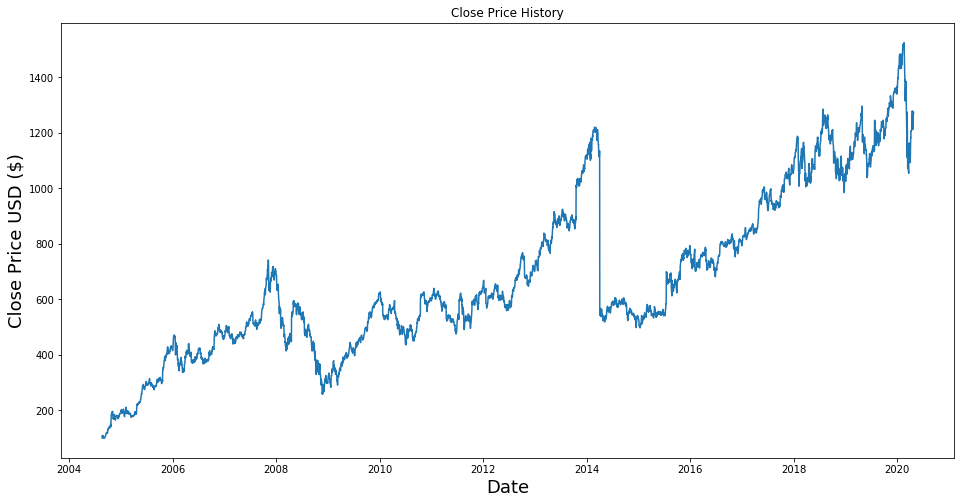

In [91]:
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(df["4. close"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [92]:
#Create a new dataframe with only the "Close colums"
data = df.filter(["4. close"])
#Convert the dataframe to a numpy array
dataset =data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

3160

In [93]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.28092585e-04],
       [5.82513370e-03],
       [6.59012113e-03],
       ...,
       [8.21947419e-01],
       [8.25758320e-01],
       [8.21729854e-01]])

In [94]:
#Create training data set
#Create the scale training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00022809, 0.00582513, 0.00659012, 0.00341086, 0.00420392,
       0.0055444 , 0.0043092 , 0.00140365, 0.0016563 , 0.00016844,
       0.00105274, 0.        , 0.00110186, 0.00160718, 0.00161419,
       0.0037337 , 0.00525666, 0.00805693, 0.00841486, 0.00979745,
       0.01226787, 0.01358028, 0.01251351, 0.01289249, 0.01460494,
       0.01391014, 0.01280828, 0.01884396, 0.02180565, 0.02076695,
       0.02285839, 0.02459891, 0.02692194, 0.02601659, 0.02725882,
       0.02647278, 0.02473927, 0.02624117, 0.02869756, 0.02946956,
       0.03095041, 0.03449462, 0.03363839, 0.02840981, 0.03464902,
       0.05082605, 0.06133234, 0.05740213, 0.06032873, 0.0654731 ,
       0.06360625, 0.06738908, 0.06657496, 0.06432913, 0.05943742,
       0.04866443, 0.05091026, 0.04820825, 0.04761871, 0.05825836])]
[0.057542495403057156]



In [95]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3100, 60, 1)

In [96]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [98]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [99]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
3100/3100 [==============================] - 205s 66ms/step - loss: 8.6917e-04


In [104]:
#Create the testing data set
#CReate a new array containing scaled values from index 3100 to 3949
test_data = scaled_data[training_data_len - 60: ,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [105]:
#Convert the data to a numpy aray
x_test = np.array(x_test)

In [106]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [108]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [109]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

19.79903028829017

D:\Users\Angel Montoya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


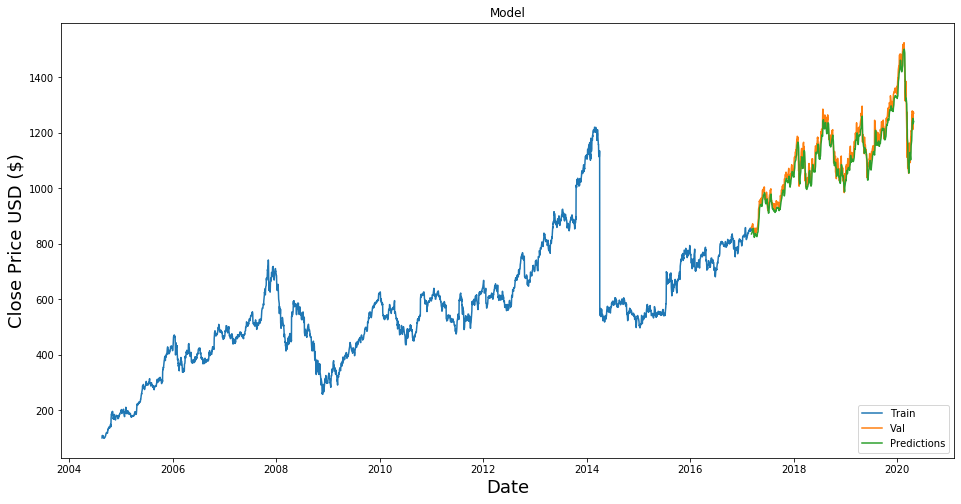

In [111]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['4. close'])
plt.plot(valid[['4. close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [112]:
#Show valid and predicted prices
valid

,4. close,Predictions
date,,
2017-03-09,857.840,835.426025
2017-03-10,861.405,837.548401
2017-03-13,864.580,840.517456
2017-03-14,865.910,843.913513
2017-03-15,868.390,847.011414
...,...,...
2020-04-21,1212.160,1251.973511
2020-04-22,1258.410,1237.350586
2020-04-23,1271.170,1232.440796


In [113]:
#

NameError: name 'web' is not defined